In [1]:
# start by loading data on the returns of the market portfolio and the risk-free rate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Momentum portfolios

Momentum portfolios bet on **cross-sectional** continuation. That is, in a stock did well relative to others in the recent past, the bet is that will continue to do better than the average going forward. 

In some ways momentum is the opposite of value , since value stocks are stocks that have had very low returns (how else they would be value?)

The difference--and every detail matter- is that value/growth focus on  the valuation ratio as as the signal of how low the price is. So the valaution ratio captures the entire history of returns (what is price if not the result of the historical returns).Momentum instead focus on the last 12 months. Recent, but not too recent. 

As we will see the strategy works best when you actually skip one month between the return signal and the portfolio construction.

**Why this might work**

Momentum in lots of way it is much more puzzling than value for rational theories. My perception is that the majority of theories proposed to explain moementum can't really make sense of it quantitatively.

* Behaviroal story: The idea here is that markets might be slow to incorporate information, so good/bad news gets into prices slowly over time. (for example investors might only slowly get into prices the consequences of covid-19. They do, but they jsut don't do enough of it)

* Rational story: Maybe all these stocks are exposed to the same missing risk-factor. They all went up and down at the same time after all! For example all firms that went down in march 2020 are particularly exposed to Covid and the ones that did well are positively exposed. So they will move togehter as COVID risk fluctuate. It is hard to use a story liek that to explain the premium, but it is easy to see how it explians the co-movement.

* My overall sense is that the majority of academics think that momentum is driven by "behavioral" factors. Note however that momentum tends to crash very badly in high volatiltiy periods such as 2008 and 2020, so it is certainly risky if you zoom out a bit.


**Construction**

Here is how [Daniel and Moskowitz](../../assets/papers/Daniel Moskowitz 2015.pdf) construct their portfolios


>To form the momentum portfolios, we first rank stocks based on their cumulative returns
from 12 months before to one month before the formation date (i.e., the t-12 to t-2-month
returns), where, consistent with the literature (Jegadeesh and Titman, 1993, Asness, 1994,
Fama and French, 1996), we use a one month gap between the end of the ranking period and
the start of the holding period to avoid the short-term reversals documented by Jegadeesh
(1990) and Lehmann (1990). In particular we will focus on 10% and 90% quantiles of the signal distribution and will construct portfolios of all stocks that are in the bottom and top quantiles

we now have our portfolio composition! 

if equal-weight we just need to invest $$1/N_{i,t}$$ in any stocks in quantile i.

where $N_{i,t}$  is the number of stocks in quantile i 

## Construct the signal

Step 1: Construct 10 month cumulative return

In [51]:
df=Data.copy()
df

,date,permno,re,rf,size,value
0,1972-07-31,10006,0.028600,0.0031,12.399869,-0.125361
1,1972-07-31,10102,0.039757,0.0031,12.217334,0.354954
2,1972-07-31,10137,-0.044767,0.0031,13.069874,-0.088697
3,1972-07-31,10145,-0.062422,0.0031,13.608366,0.075484
4,1972-07-31,10153,-0.065600,0.0031,11.752572,0.944457
...,...,...,...,...,...,...
486422,2016-12-31,93420,0.011056,0.0003,14.337515,1.049163
486423,2016-12-31,93422,-0.063881,0.0003,15.256946,0.829353
486424,2016-12-31,93423,0.039950,0.0003,15.502888,-2.128977
486425,2016-12-31,93429,0.072124,0.0003,15.504722,-3.001095


In [52]:
df=Data.copy()
df['logret']=np.log(df['re']+1)
temp=df.groupby('permno')[['logret']].rolling(window=11,min_periods=7).sum()
temp =temp.reset_index()
temp['cumret']=np.exp(temp['logret'])-1 # transform back in geometric  returns
temp.tail(12)

# Alternative way to do product with rolling method:
# df['grossret']=df['re']+1
# temp1=df.groupby('permno')['grossret'].rolling(window=12).apply(np.prod, raw=True)-1
# temp1=temp1.reset_index().rename(columns={'grossret':'cumret'})
# print(temp1.tail(12))

,permno,level_1,logret,cumret
486415,93436,476844,-0.061781,-0.059911
486416,93436,477720,0.016181,0.016312
486417,93436,478596,0.015735,0.015859
486418,93436,479469,-0.041539,-0.040688
486419,93436,480348,-0.184545,-0.168518
486420,93436,481226,-0.227155,-0.203203
486421,93436,482075,-0.060185,-0.058409
486422,93436,482937,-0.159811,-0.147695
486423,93436,483803,-0.015725,-0.015602
486424,93436,484670,-0.154125,-0.142835


In [53]:
df=Data.copy()
df['logret']=np.log(df['re']+1)
df.set_index('date',inplace=True)
df

,permno,re,rf,size,value,logret
date,,,,,,
1972-07-31,10006,0.028600,0.0031,12.399869,-0.125361,0.028199
1972-07-31,10102,0.039757,0.0031,12.217334,0.354954,0.038987
1972-07-31,10137,-0.044767,0.0031,13.069874,-0.088697,-0.045800
1972-07-31,10145,-0.062422,0.0031,13.608366,0.075484,-0.064455
1972-07-31,10153,-0.065600,0.0031,11.752572,0.944457,-0.067851
...,...,...,...,...,...,...
2016-12-31,93420,0.011056,0.0003,14.337515,1.049163,0.010995
2016-12-31,93422,-0.063881,0.0003,15.256946,0.829353,-0.066013
2016-12-31,93423,0.039950,0.0003,15.502888,-2.128977,0.039172


In [59]:
df[df.permno==93436].tail(11).sum()

permno    1.027796e+06
re        1.515577e-01
rf        2.000000e-03
size      1.903013e+02
value    -3.677525e+01
logret    1.092395e-01
dtype: float64

In [64]:
# what is the problem of this above?
df=Data.copy()
df['logret']=np.log(df['re']+1)
df.set_index('date',inplace=True)
temp=df.groupby('permno')[['logret']].rolling(window=11,min_periods=7).sum()
temp =temp.reset_index()
temp['cumret']=np.exp(temp['logret'])-1 # transform back in geometric  returns
temp.tail(11)

,permno,date,logret,cumret
486416,93436,2016-02-29,0.016181,0.016312
486417,93436,2016-03-31,0.015735,0.015859
486418,93436,2016-04-30,-0.041539,-0.040688
486419,93436,2016-05-31,-0.184545,-0.168518
486420,93436,2016-06-30,-0.227155,-0.203203
486421,93436,2016-07-31,-0.060185,-0.058409
486422,93436,2016-08-31,-0.159811,-0.147695
486423,93436,2016-09-30,-0.015725,-0.015602
486424,93436,2016-10-31,-0.154125,-0.142835
486425,93436,2016-11-30,-0.238646,-0.212306


In [65]:
# merge the 12 month return signal back to the original database
temp = pd.merge(df.reset_index(), temp[['permno','date','cumret']], how='left', on=['permno','date'])

# lag cumulative return by TWO months for each ind

temp=temp.sort_values(['date','permno'])
temp['mom']=temp.groupby('permno')['cumret'].shift(2)

# why I am groupby permno here befroe lagging?

temp.tail()

,date,permno,re,rf,size,value,logret,cumret,mom
486422,2016-12-31,93420,0.011056,0.0003,14.337515,1.049163,0.010995,-0.496271,-0.627295
486423,2016-12-31,93422,-0.063881,0.0003,15.256946,0.829353,-0.066013,-0.051554,-0.281308
486424,2016-12-31,93423,0.039950,0.0003,15.502888,-2.128977,0.039172,0.242901,0.105260
486425,2016-12-31,93429,0.072124,0.0003,15.504722,-3.001095,0.069642,0.122782,-0.113789
486426,2016-12-31,93436,0.127947,0.0003,17.262975,-3.328269,0.120399,0.115429,-0.142835


## Rank assets by signal

In [66]:

mom=temp.sort_values(['date','permno']) # sort by date and firm identifier 

mom=mom.dropna(subset=['mom'], how='any')# drop the row if any of 'mom' is missing

# create 10 groups each month. Assign membership accroding to the stock ranking in the distribution of trading signal 
#in a given month 
ngroups=10
mom['mom_group']=mom.groupby(['date'])['mom'].transform(lambda x: pd.qcut(x, ngroups, labels=False, duplicates='drop'))

# transform in string the group names

mom.tail(24)

,date,permno,re,rf,size,value,logret,cumret,mom,mom_group
486399,2016-12-31,92618,0.051118,0.0003,16.703380,-1.779606,0.049854,-0.013280,-0.001583,4.0
486400,2016-12-31,92648,-0.044969,0.0003,14.992626,0.115678,-0.046011,0.619729,0.172308,7.0
486401,2016-12-31,92655,0.010564,0.0003,18.715241,-1.054810,0.010509,0.410347,0.273162,9.0
486402,2016-12-31,92709,0.030165,0.0003,15.594910,-0.992501,0.029719,0.186674,0.144768,7.0
486406,2016-12-31,92940,-0.100970,0.0003,14.805160,-2.277632,-0.106439,-0.103647,-0.006957,4.0
486408,2016-12-31,93089,-0.023290,0.0003,16.431426,-1.996802,-0.023565,0.109714,0.086122,6.0
486409,2016-12-31,93096,-0.039100,0.0003,17.099242,-1.197810,-0.039885,-0.002797,0.067279,5.0
486410,2016-12-31,93101,0.024100,0.0003,15.831392,-1.105060,0.023814,0.286109,-0.016248,3.0
486411,2016-12-31,93132,0.000364,0.0003,15.510622,-1.956233,0.000364,0.068228,-0.111554,2.0
486412,2016-12-31,93150,0.044498,0.0003,15.677481,0.319196,0.043536,0.476400,-0.144432,1.0


## Equal-weighted portfolio within each group

In [67]:
mom_ew = mom.groupby(['date','mom_group']).re.mean()
mom_ew=mom_ew.unstack(level=-1) # unstack so we have in each column the different portfolios, and in each 
# row the different dates
mom_ew.head()

mom_group,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
date,,,,,,,,,,
1973-03-31,-0.055444,-0.029109,-0.032968,-0.025105,-0.021100,-0.026742,-0.024088,-0.023865,-0.006292,0.002724
1973-04-30,-0.129084,-0.100427,-0.078103,-0.066254,-0.067102,-0.053758,-0.024593,-0.035073,-0.033044,-0.040546
1973-05-31,-0.102784,-0.069913,-0.084575,-0.063392,-0.051464,-0.036894,-0.038951,-0.012665,-0.019062,-0.012896
1973-06-30,-0.081551,-0.046449,-0.050188,-0.034786,-0.028009,-0.031990,-0.023072,-0.004237,-0.022921,-0.018874
1973-07-31,0.140908,0.138727,0.118585,0.094319,0.078456,0.080899,0.047883,0.009008,0.032286,0.039165


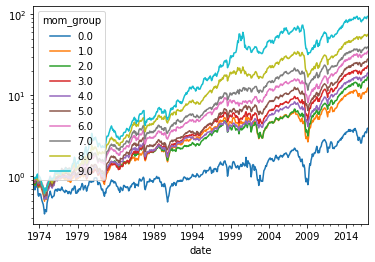

In [68]:
(mom_ew+1).cumprod().plot(logy=True)
plt.show()

> How to construct value-weighted portfolios?
> What are the steps? Where would you change the code? How?

In [74]:
Data

,permno,re,rf,size,value,logret
date,,,,,,
1972-07-31,10006,0.028600,0.0031,12.399869,-0.125361,0.028199
1972-07-31,10102,0.039757,0.0031,12.217334,0.354954,0.038987
1972-07-31,10137,-0.044767,0.0031,13.069874,-0.088697,-0.045800
1972-07-31,10145,-0.062422,0.0031,13.608366,0.075484,-0.064455
1972-07-31,10153,-0.065600,0.0031,11.752572,0.944457,-0.067851
...,...,...,...,...,...,...
2016-12-31,93420,0.011056,0.0003,14.337515,1.049163,0.010995
2016-12-31,93422,-0.063881,0.0003,15.256946,0.829353,-0.066013
2016-12-31,93423,0.039950,0.0003,15.502888,-2.128977,0.039172


In [85]:
# put it all together in a fuction

def momentum(df,ngroups=10,lookback=11,skip=2,minperiods=7):

    df['logret']=np.log(df['re']+1)
    df.set_index('date',inplace=True)
    temp=df.groupby('permno')[['logret']].rolling(window=lookback,min_periods=minperiods).sum()
    temp =temp.reset_index()
    temp['cumret']=np.exp(temp['logret'])-1 # transform back in geometric  returns
    # merge the 12 month return signal back to the original database
    temp = pd.merge(df.reset_index(), temp[['permno','date','cumret']], how='left', on=['permno','date'])
    # lag cumulative return by TWO months for each ind
    temp=temp.sort_values(['date','permno'])
    temp['mom']=temp.groupby('permno')['cumret'].shift(skip)
    mom=temp.sort_values(['date','permno']) # sort by date and firm identifier 
    mom=mom.dropna(subset=['mom'], how='any')# drop the row if any of 'mom' is missing
    mom['mom_group']=mom.groupby(['date'])['mom'].transform(lambda x: pd.qcut(x, ngroups, labels=False, duplicates='drop'))

    mom_ew = mom.groupby(['date','mom_group']).re.mean()
    mom_ew=mom_ew.unstack(level=-1)   
    return mom_ew
    

In [82]:
def vol(df,ngroups=10,lookback=11,skip=2,minperiods=7):

    df['logret']=np.log(df['re']+1)
    df.set_index('date',inplace=True)
    temp=df.groupby('permno')[['logret']].rolling(window=lookback,min_periods=minperiods).std()
    temp =temp.reset_index()
    temp['signal']=temp['logret'] # transform back in geometric  returns
    # merge the 12 month return signal back to the original database
    temp = pd.merge(df.reset_index(), temp[['permno','date','signal']], how='left', on=['permno','date'])
    # lag cumulative return by TWO months for each ind
    temp=temp.sort_values(['date','permno'])
    temp['mom']=temp.groupby('permno')['signal'].shift(skip)
    mom=temp.sort_values(['date','permno']) # sort by date and firm identifier 
    mom=mom.dropna(subset=['mom'], how='any')# drop the row if any of 'mom' is missing
    mom['group']=mom.groupby(['date'])['signal'].transform(lambda x: pd.qcut(x, ngroups, labels=False, duplicates='drop'))

    mom_ew = mom.groupby(['date','group']).re.mean()
    mom_ew=mom_ew.unstack(level=-1)   
    return mom_ew
    

In [83]:
Rvol=vol(Data.reset_index(),ngroups=10,lookback=24,skip=1,minperiods=12)
Rvol.mean()*12

group
0.0    0.084482
1.0    0.085391
2.0    0.090425
3.0    0.097556
4.0    0.098551
5.0    0.101296
6.0    0.101661
7.0    0.098094
8.0    0.097460
9.0    0.091338
dtype: float64

In [84]:
Rvol.std()

group
0.0    0.027959
1.0    0.032804
2.0    0.037395
3.0    0.042476
4.0    0.046231
5.0    0.051208
6.0    0.055100
7.0    0.061599
8.0    0.070262
9.0    0.095462
dtype: float64

In [87]:
R=momentum(Data.reset_index(),ngroups=10,lookback=60,skip=2,minperiods=55)
R.mean()*12

mom_group
0.0    0.122966
1.0    0.106698
2.0    0.100568
3.0    0.097087
4.0    0.097499
5.0    0.089042
6.0    0.084539
7.0    0.094369
8.0    0.089674
9.0    0.094432
dtype: float64

In [80]:
Rmom=momentum(Data.reset_index(),ngroups=5,lookback=11,skip=2,minperiods=7)
Rmom.mean()*12

mom_group
0.0    0.068810
1.0    0.083678
2.0    0.084864
3.0    0.095627
4.0    0.117062
dtype: float64

In [81]:
Rrev=momentum(Data.reset_index(),ngroups=5,lookback=1,skip=1,minperiods=1)
Rrev.mean()*12

mom_group
0.0    0.118744
1.0    0.107519
2.0    0.092546
3.0    0.075710
4.0    0.043476
dtype: float64

# The General Recipe

1. Decide on a trading signal (last 12 month return, Book/Market,beta,...)

2. Calculate the trading signal for each stock

3. Group the stocks according to the strength of the trading signal
    
    - must choose the number of groups, i.e. number of portfolios
    
    - If you choose very few (lets say two)
      - you get the benefit from diversification
      - but also suffer from the cost of having only a small spread on the strength of the trading signal across portfolios
    
    - If you choose a lot of groups (say 100)
      - you benefit from having a large spread in the trading signal
      - but there are just very few stocks in each portfolio, so you will have a very volatile portfolio 
        - Portfolio 100 only has really strong stocks
        - Portfolio 1 only has really weak stocks   
    
    
4. You have to decide how to weight the stocks within each bin

     - Value-weighting makes your strategy more likely to be traded at low cost
     
     - Equal-weighting can sometimes provide more diversification

### Questions

1. How do we change the code to make a bet on short-term reversal, instead of medium term momentum?

2. How do we change the code to make a bet on long-term reversal? What strategy should this be similar to? What are the key differences?

3. How do I change the code to make a bet on cross-sectional volatility? I.e. instead of sorting on cumulative returns, sort on, say, 24 months volatility?

4. How do I change the code to make a play against market beta? i.e., instead of using cumulative returns as the signal, use the 24 month rolling CAPM beta of the porfolio.



# What have we covered?

* We learned how to go from signals to portfolios and returns

* We learned how to do that in the time-series, by shifting in and out of the market according to a signal. We did constructed a couple of strategies this way, but the approach applies for any signal

* We learned how to do that in the cross-sectional, by changing the composition of our risky portfolio

* We learned how to do that in the "scalable" approach, which can be applied to any number of assets and it is very fast

* We learned about long-short self-financed portfolios

* Importantly, this methodology is general to ANY Quantitative Investing strategy. All you need to do is to change the signal. 

  * In out case it was Book-to-Market lagged a few months
  
* We learned about the different approaches to weight the portfolios

  


## Bonus material

### Signal-Weighted portfolios


* In industry, it is common to use the signals to weight the portfolios

* Lots of different ways of doign it. Here is a neat way

* we rank stocks in a given date by a given characterisitc and normalize by the overall number of stocks in that date

$$rc_{s,t}=\frac{rank_t(c_{s,t})}{1+n_{t}}$$

* this gives a number between 0 and 1 where the highest ranked stock has value n/(n+1) and the lowest value has ranking 0/(n+1)

$$w_{s,t}=\frac{(rc_{s,t}-\bar{rc_{s,t}})}{\frac{1}{n_t}\sum_{s=1}^{n_t}|rc_{s,t}-\bar{rc_{s,t}}|)}$$

* We then normalized by the absolute deviaitons